#                 Статистика


##          Cеминар 1. Введение в numpy и scipy, методы генерации случайных величин.


###                                                28 сентября 2018г.

In [1]:
import numpy as np
import math as m

from __future__ import (division, print_function, unicode_literals) ## для совместимости 2го и 3го Питона

import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Numpy:

In [2]:
a = np.array([1,2,3])
b = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [3]:
b.dot(a)

array([14, 32, 50])

In [4]:
b*a

array([[ 1,  4,  9],
       [ 4, 10, 18],
       [ 7, 16, 27]])

In [5]:
b*a.reshape(-1,1)

array([[ 1,  2,  3],
       [ 8, 10, 12],
       [21, 24, 27]])

In [6]:
np.percentile(a, 70)

2.3999999999999999

In [7]:
print("Mean: {}, STD: {}, Med: {}".format(a.mean(), a.std(), np.percentile(a, 20, interpolation='lower')))

Mean: 2.0, STD: 0.816496580928, Med: 1


In [8]:
b.mean(axis = 0)

array([ 4.,  5.,  6.])

In [9]:
b.mean(axis = 1)

array([ 2.,  5.,  8.])

### matplotlib

In [10]:
x_arr = np.linspace(-10, 10, 2001)

In [11]:
y_arr = np.sin(np.linspace(-10, 10, 2001))

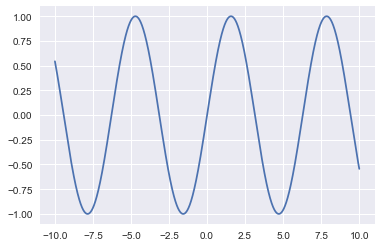

In [12]:
plt.plot(x_arr, y_arr)

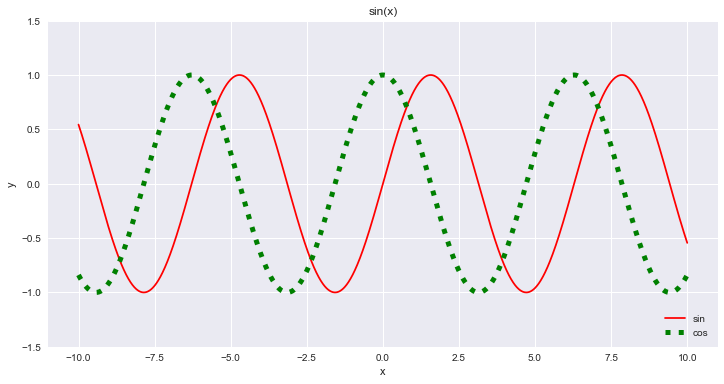

In [13]:
plt.figure(figsize = (12,6))
plt.title("sin(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim((-1.5, 1.5))
plt.plot(x_arr, y_arr, color = 'red', label = "sin")
plt.plot(x_arr, np.cos(x_arr), color = 'green', label = "cos", linewidth = 5, linestyle = ":")
plt.legend(loc = 4)

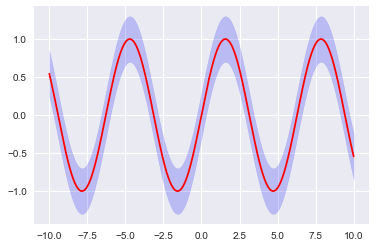

In [15]:
plt.fill_between(x_arr, y_arr-0.3, y_arr+0.3, color='blue', alpha='0.2')
plt.plot(x_arr, y_arr, color = 'red', label = "sin")

(array([  3.,   2.,   1.,   3.,   5.,  10.,   8.,   9.,   7.,  11.,  11.,
          5.,   4.,   6.,   4.,   5.,   2.,   2.,   1.,   1.]),
 array([-2.06283223, -1.84248397, -1.62213571, -1.40178746, -1.1814392 ,
        -0.96109094, -0.74074269, -0.52039443, -0.30004617, -0.07969792,
         0.14065034,  0.3609986 ,  0.58134685,  0.80169511,  1.02204337,
         1.24239162,  1.46273988,  1.68308814,  1.90343639,  2.12378465,
         2.3441329 ]),
 <a list of 20 Patch objects>)

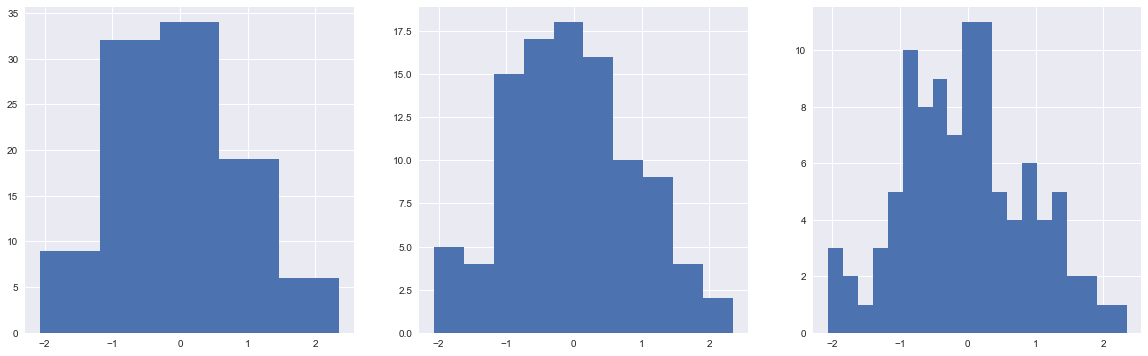

In [16]:
points = np.random.randn(100)
f, axes = plt.subplots(1, 3, figsize = (20, 6))
axes[0].hist(points, bins=5)
axes[1].hist(points, bins=10)
axes[2].hist(points, bins=20)

(array([  3.,   2.,   1.,   3.,   5.,  10.,   8.,   9.,   7.,  11.,  11.,
          5.,   4.,   6.,   4.,   5.,   2.,   2.,   1.,   1.]),
 array([-2.06283223, -1.84248397, -1.62213571, -1.40178746, -1.1814392 ,
        -0.96109094, -0.74074269, -0.52039443, -0.30004617, -0.07969792,
         0.14065034,  0.3609986 ,  0.58134685,  0.80169511,  1.02204337,
         1.24239162,  1.46273988,  1.68308814,  1.90343639,  2.12378465,
         2.3441329 ]),
 <a list of 20 Patch objects>)

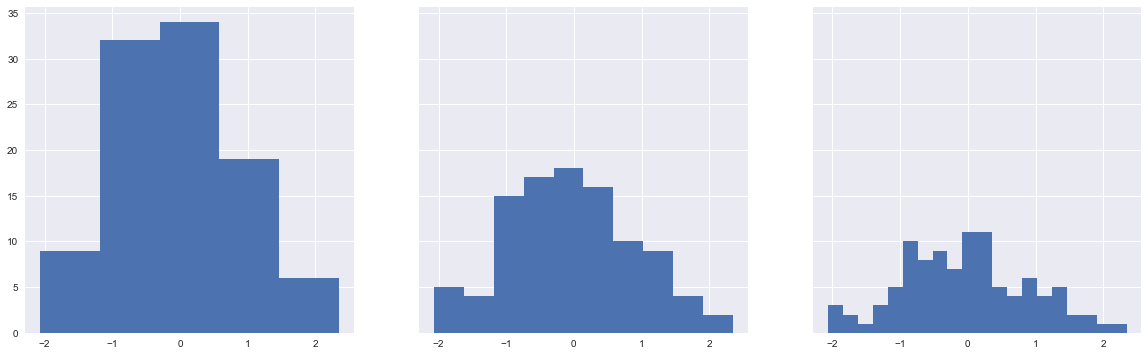

In [17]:
f, axes = plt.subplots(1, 3, sharey=True, figsize = (20, 6))
axes[0].hist(points, bins=5)
axes[1].hist(points, bins=10)
axes[2].hist(points, bins=20)

### scipy

In [18]:
from scipy.optimize import minimize

In [19]:
def f(x):
    return x**4 - 2*x**2+2*x

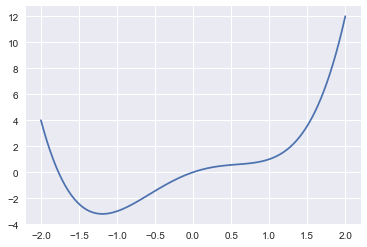

In [20]:
plt.plot(np.linspace(-2,2,101), f(np.linspace(-2,2,101)))

In [21]:
res = minimize(f, 5)

In [22]:
(res.x, res.fun)

(array([-1.19148775]), -3.2068752035366437)

In [23]:
def g((x, y)):
    return x**2 + (y-1)**2

In [24]:
res = minimize(g, [1, 3])

In [25]:
(res.x, res.fun)

(array([ -1.06541975e-08,   9.99999979e-01]), 5.675596338880969e-16)

In [26]:
from scipy.optimize import fsolve

In [27]:
def parabola(x):
    return x**2 - 2*x - 8

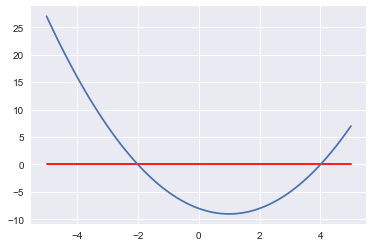

In [28]:
plt.plot(np.linspace(-5,5,101), [0 for _ in np.linspace(-5,5,101)], color = "red")
plt.plot(np.linspace(-5,5,101), parabola(np.linspace(-5,5,101)))

In [29]:
fsolve(parabola, 3)

array([ 4.])

In [30]:
fsolve(parabola, -1)

array([-2.])

In [31]:
fsolve(parabola, 1)

array([ 4.])

### Квартет Энскомба

In [32]:
df = sns.load_dataset("anscombe")
datasets = df.dataset.unique()
data = []
for dataset in datasets:
    data.append(df[df['dataset'] == dataset][['x','y']].values)
    print(data[-1])
    print('------')

[[ 10.     8.04]
 [  8.     6.95]
 [ 13.     7.58]
 [  9.     8.81]
 [ 11.     8.33]
 [ 14.     9.96]
 [  6.     7.24]
 [  4.     4.26]
 [ 12.    10.84]
 [  7.     4.82]
 [  5.     5.68]]
------
[[ 10.     9.14]
 [  8.     8.14]
 [ 13.     8.74]
 [  9.     8.77]
 [ 11.     9.26]
 [ 14.     8.1 ]
 [  6.     6.13]
 [  4.     3.1 ]
 [ 12.     9.13]
 [  7.     7.26]
 [  5.     4.74]]
------
[[ 10.     7.46]
 [  8.     6.77]
 [ 13.    12.74]
 [  9.     7.11]
 [ 11.     7.81]
 [ 14.     8.84]
 [  6.     6.08]
 [  4.     5.39]
 [ 12.     8.15]
 [  7.     6.42]
 [  5.     5.73]]
------
[[  8.     6.58]
 [  8.     5.76]
 [  8.     7.71]
 [  8.     8.84]
 [  8.     8.47]
 [  8.     7.04]
 [  8.     5.25]
 [ 19.    12.5 ]
 [  8.     5.56]
 [  8.     7.91]
 [  8.     6.89]]
------


In [33]:
%precision 2
for i in range(4):
    print("Dataset {}: MEAN: {} STD: {} CORR {}".format(datasets[i],\
                                                        data[i].mean(axis=0),\
                                                        data[i].std(axis=0),\
                                                        np.corrcoef(data[i].T)[0,1]))

Dataset I: MEAN: [ 9.   7.5] STD: [ 3.16  1.94] CORR 0.816420516345
Dataset II: MEAN: [ 9.   7.5] STD: [ 3.16  1.94] CORR 0.816236506
Dataset III: MEAN: [ 9.   7.5] STD: [ 3.16  1.94] CORR 0.81628673949
Dataset IV: MEAN: [ 9.   7.5] STD: [ 3.16  1.94] CORR 0.816521436889


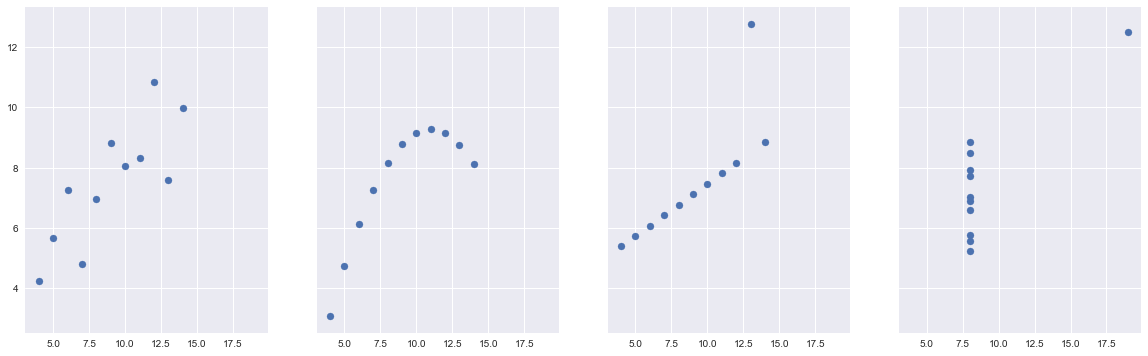

In [34]:
figure(figsize=(16, 4))
f, axes = plt.subplots(1, 4, sharey = True, sharex = True, figsize = (20, 6))
for idx, X in enumerate(data):
    axes[idx].scatter(X[:, 0], X[:, 1])

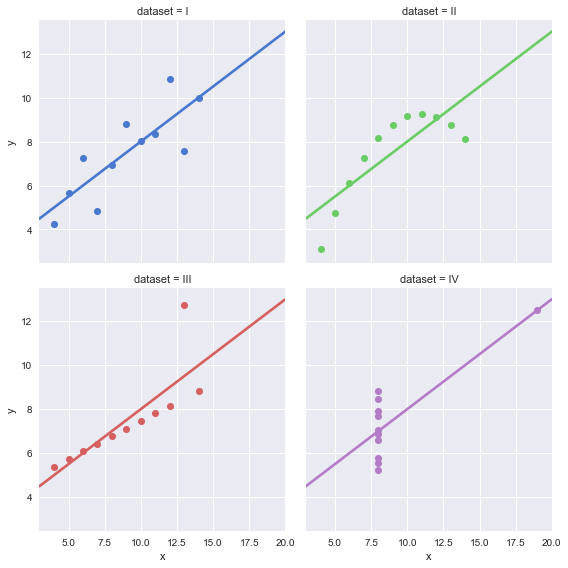

In [35]:

sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

## Методы генерации случайных величин.

### numpy.random:

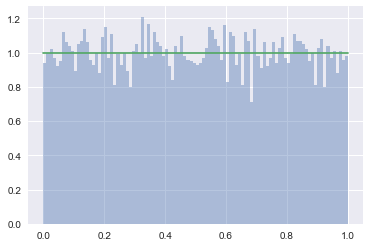

In [41]:
sample = np.random.rand(10000)
sns.distplot(sample, bins = 100, kde = False, norm_hist=True)
plt.plot(np.linspace(0,1), [1. for _ in np.linspace(0,1)])

In [45]:
from scipy.stats import norm

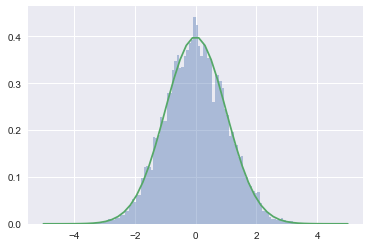

In [46]:
sns.distplot(np.random.randn(10000), bins = 100, kde = False, norm_hist=True)
plt.plot(np.linspace(-5,5), [norm.pdf(_) for _ in np.linspace(-5,5)])

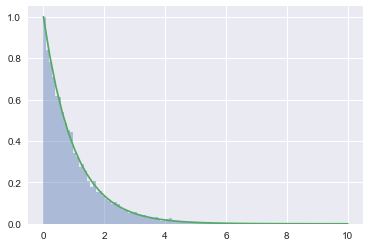

In [49]:
from scipy.stats import expon
sns.distplot(np.random.standard_exponential(10000), bins = 100, kde = False, norm_hist=True)
plt.plot(np.linspace(0,10), [expon.pdf(_) for _ in np.linspace(0, 10)])

In [365]:
np.random.choice([1,2,3], size = 4)

array([2, 1, 1, 3])

### scipy.stats:

https://docs.scipy.org/doc/scipy/reference/stats.html

In [58]:
from scipy.stats import beta

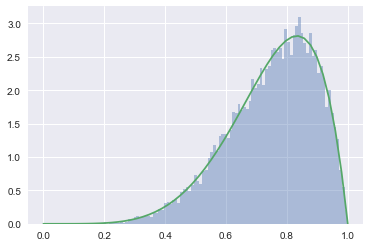

In [62]:
alpha = 6
bheta = 2
sns.distplot(beta.rvs(alpha, bheta, size = 10000), bins = 100, kde = False, norm_hist=True)
plt.plot(np.linspace(0,1), [beta.pdf(_, alpha, bheta) for _ in np.linspace(0, 1)])

Плотность:

In [136]:
beta.pdf(0.4, 6, 2)

0.26

Функция распределения:

In [140]:
beta.cdf(0.8, 6, 2)

0.58

Квантили:

In [144]:
beta.ppf(0.5, 6, 2)

0.77

In [76]:
import scipy.stats as st

class Exp(st.rv_continuous):
    # Плотность распределения вероятностей для экспоненциального распределения
    def _pdf(self, x):
        return np.exp(-x) if x>0 else 0.

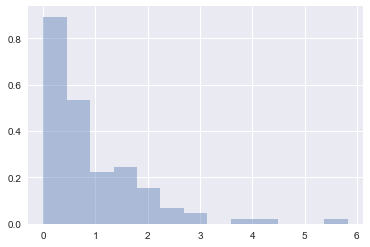

In [80]:
expon = Exp()
sns.distplot(expon.rvs(size = 100), kde = False, norm_hist=True)

## Метод максимального правдоподобия:

In [81]:
sample = np.random.randn(100)*2+2

In [82]:
sample.mean()

1.92

In [83]:
sample.var()

3.43

In [84]:
from scipy.stats import norm

def log_pdf((a, sigma)):
    return -np.sum(norm.logpdf(sample, loc=a, scale=sigma))

In [85]:
res = minimize(log_pdf, [1, 3])

In [86]:
res.x

array([ 1.92,  1.85])

## Задача:



1) Сгенерировать выборку из распределения Коши (размера 1000), построить для него гистограмму.

2) Считая, что перед вами выборка из нормального распределения, посчитать оценку на дисперсию.

3) Посмотреть, как эти оценки будут себя вести при увеличении количества 
членов выборки, построить график.